In [1]:
from PIL import Image
import numpy as np
import math

class Transformations():
    """ A class that performs rotation
        and skew on images
    """
    def open_image(self, image, grey_scale):
        if grey_scale:
            image = np.array(Image.open(image).convert('LA'))
        else:
            image = np.array(Image.open(image))
        self.image = image
        self.height = image.shape[0]
        self.width = image.shape[1]
        if(len(image.shape)<3):
            self.channel = 0
        else:
            self.channel = image.shape[2]

    def angle_to_radians(self, angle):
        angle = math.radians(angle)
        return angle

    def new_matrix(self):
        if self.channel:
            output = np.zeros((self.new_height, self.new_width, self.channel))
        else:
            output = np.zeros((self.new_height, self.new_width))
        return output
    
    def rotate(self, x, y):
        """
        Original rotaion function using the rotation Matrix
        """
        new_y = round(-x * self.sine + y * self.cosine)
        new_x = round(y * self.sine + x * self.cosine)
        return new_y, new_x
    
    def new_rotate(self, x, y):
        """
        Rotating with the help of multiple shears.
        Reference:https://datagenetics.com/blog/august32013/index.html
        """
        tangent=math.tan(self.angle/2)
        new_x=round(x-y*tangent)
        new_y=y
        new_y=round(new_x*math.sin(self.angle)+new_y)
        new_x=round(new_x-new_y*tangent) 
        return new_y,new_x
        
    def calculate_attributes(self, image, angle, grey_scale, shear):
        self.open_image(image, grey_scale)
        angle = angle + 0.00001 if abs(angle) == 30 else angle
        angle = -angle if shear else angle        
        self.angle = self.angle_to_radians(angle)
        self.sine = math.sin(self.angle)
        if shear:
            if angle == 90:
                return "Undefined"
            self.tangent=math.tan(self.angle)
            self.new_width = round(abs(self.width) + abs(self.height)*abs(self.tangent)) + 1
            self.new_height = self.height
        else:
            self.cosine = math.cos(self.angle)
            self.new_width = round(abs(self.width * self.cosine) + abs(self.height * self.sine)) + 1
            self.new_height = round(abs(self.height * self.cosine) + abs(self.width * self.sine)) + 1
        
        self.output = self.new_matrix()
        self.centre_height = round(((self.height + 1) / 2) - 1)
        self.centre_width = round(((self.width + 1) / 2) - 1)
        self.new_centre_height = round(((self.new_height+1)/2)-1)
        self.new_centre_width = round(((self.new_width+1)/2)-1)
        

    def transform(self, image, angles, grey_scale=False, shear=False):
        name = None
        for angle in angles:
            image = name if name else image
            self.calculate_attributes(image, angle, grey_scale, shear)
            for i in range(self.height):
                for j in range(self.width):
                    y = self.height - i - self.centre_height - 1
                    x = self.width - j - self.centre_width - 1
                    if shear:
#                         new_x = round(y*(self.sine) + x)
#                         tangent=math.tan(angle)
                        new_x = round(y*(self.tangent) + x)
                        new_y = y
                    else:
#                         new_y, new_x = self.rotate(x, y)
                        new_y, new_x = self.new_rotate(x,y)
                    new_y = self.new_centre_height - new_y
                    new_x = self.new_centre_width - new_x
                    if new_x < self.new_width and new_y < self.new_height:
                        if self.channel:
                            self.output[new_y, new_x, :] = self.image[i, j, :]
                        else:
                            self.output[new_y, new_x] = self.image[i, j]
        return self.output


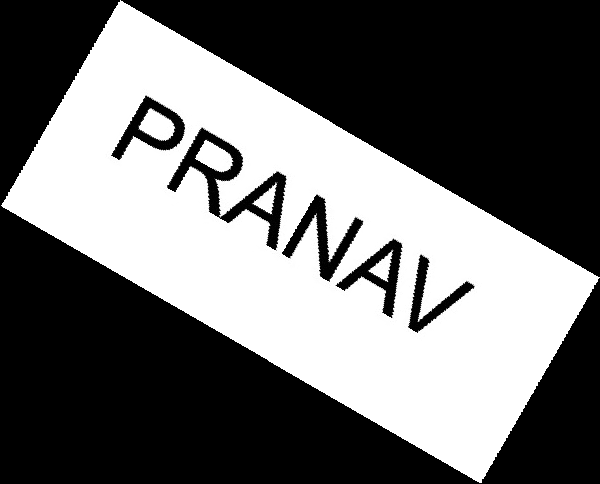

In [2]:
test = Transformations()
image = test.transform("dataset/name.jpg", [30], grey_scale=False, shear=False)
Image.fromarray((image).astype(np.uint8))

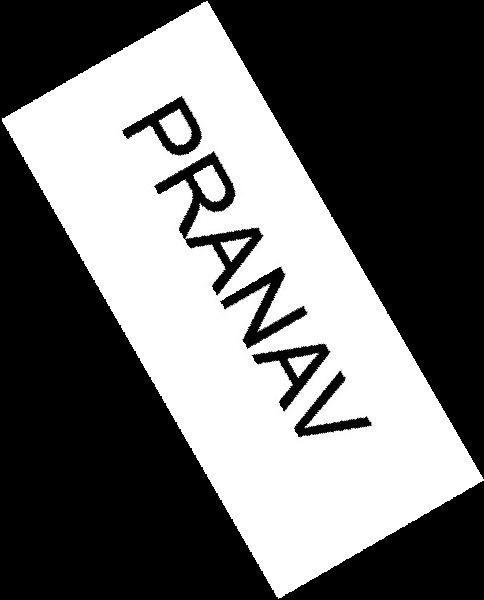

In [3]:
test = Transformations()
image = test.transform("dataset/name.jpg", [60], grey_scale=False, shear=False)
Image.fromarray((image).astype(np.uint8))

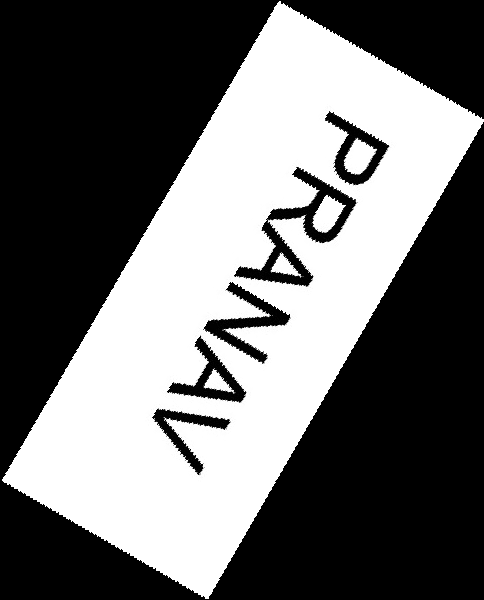

In [4]:
test = Transformations()
image = test.transform("dataset/name.jpg", [120], grey_scale=False, shear=False)
Image.fromarray((image).astype(np.uint8))

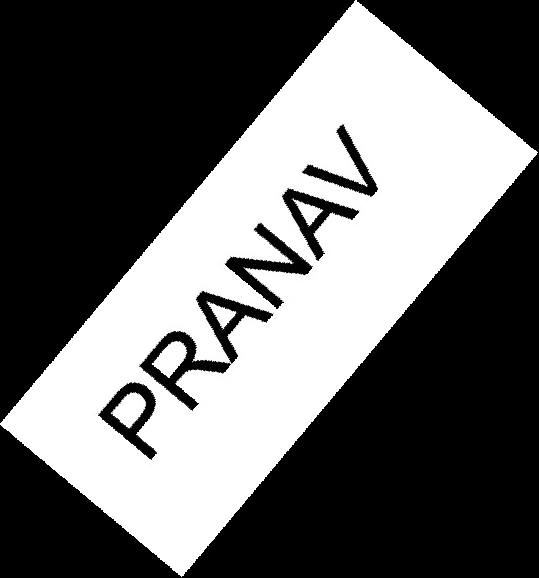

In [5]:
test = Transformations()
image = test.transform("dataset/name.jpg", [-50], grey_scale=False, shear=False)
Image.fromarray((image).astype(np.uint8))

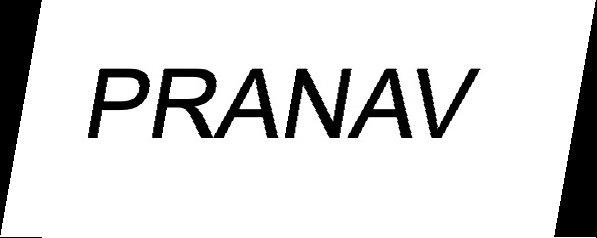

In [6]:
test = Transformations()
image = test.transform("dataset/name.jpg", [10], grey_scale=False, shear=True)
Image.fromarray((image).astype(np.uint8))

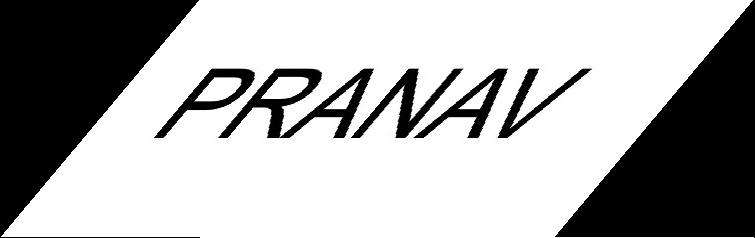

In [7]:
test = Transformations()
image = test.transform("dataset/name.jpg", [40], grey_scale=False, shear=True)
Image.fromarray((image).astype(np.uint8))

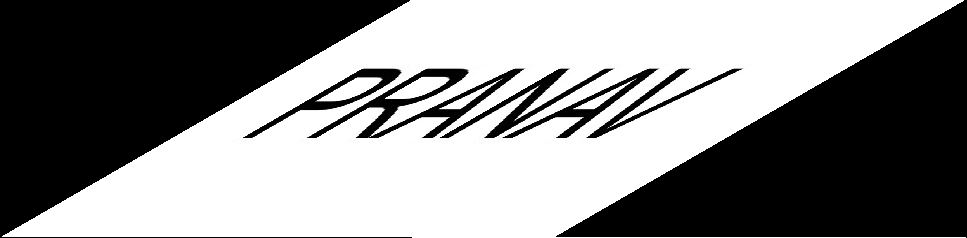

In [8]:
test = Transformations()
image = test.transform("dataset/name.jpg", [60], grey_scale=False, shear=True)
Image.fromarray((image).astype(np.uint8))

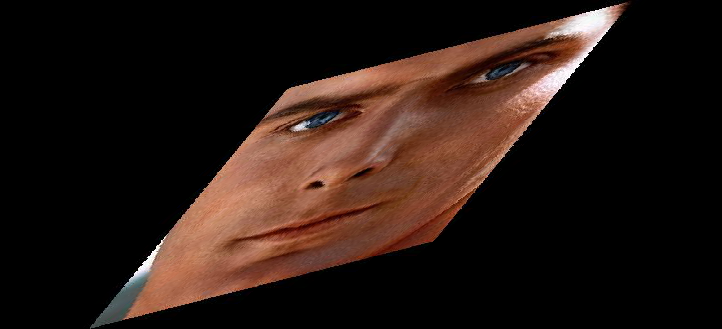

In [9]:
test = Transformations()
image = test.transform("dataset/DatasetA/face-1.jpg", [-20], grey_scale=False, shear=False)
image = Image.fromarray((image).astype(np.uint8))
image.save("dataset/DatasetA/face-1-rotate.jpg")
image = test.transform("dataset/DatasetA/face-1-rotate.jpg", [50], grey_scale=False, shear=True)
Image.fromarray((image).astype(np.uint8))

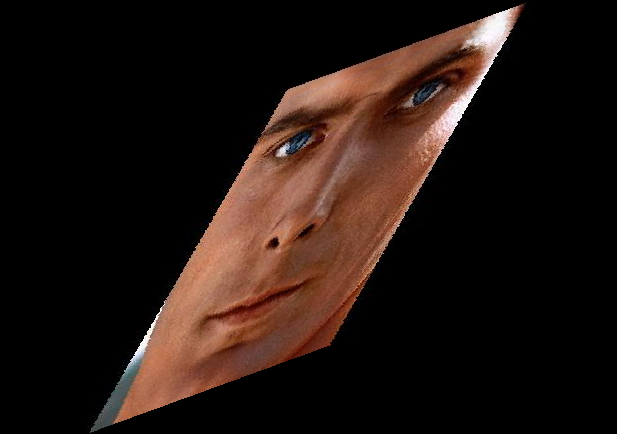

In [10]:
test = Transformations()
image = test.transform("dataset/DatasetA/face-1.jpg", [50], grey_scale=False, shear=True)
image = Image.fromarray((image).astype(np.uint8))
image.save("dataset/DatasetA/face-1-shear.jpg")
image = test.transform("dataset/DatasetA/face-1-shear.jpg", [-20], grey_scale=False, shear=False)
Image.fromarray((image).astype(np.uint8))